In [1]:
pip install keras tensorflow pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

2025-02-19 08:22:50.219386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739949770.254641    5851 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739949770.263455    5851 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-19 08:22:50.291968: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# 1. Charger et préparer les données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normaliser les valeurs de pixel entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplatir les images 28x28 en vecteurs de 784
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [4]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
# 2. Définir le modèle de réseau neuronal
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))  # 10 classes (chiffres de 0 à 9)

/home/myalta/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-19 08:23:00.295891: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
# 3. Compiler le modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Entraîner le modèle
# Utilisation de EarlyStopping pour éviter le sur-apprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10


2025-02-19 08:23:01.291803: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.8514 - loss: 0.4906 - val_accuracy: 0.9653 - val_loss: 0.1051
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.9655 - loss: 0.1135 - val_accuracy: 0.9758 - val_loss: 0.0769
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9778 - loss: 0.0738 - val_accuracy: 0.9774 - val_loss: 0.0684
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 40ms/step - accuracy: 0.9820 - loss: 0.0554 - val_accuracy: 0.9789 - val_loss: 0.0659
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9850 - loss: 0.0457 - val_accuracy: 0.9813 - val_loss: 0.0631
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - accuracy: 0.9874 - loss: 0.0383 - val_accuracy: 0.9829 - val_loss: 0.0615
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.9873 - loss: 0.0366 - val_accuracy: 0.9785 - val_loss: 0.0670
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accurac

In [7]:
# 5. Évaluer le modèle
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Loss:', loss)
print('Accuracy:', accuracy)


Loss: 0.06153864040970802
Accuracy: 0.9829000234603882


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


Text(0.5, 1.0, 'Prédiction : 9')

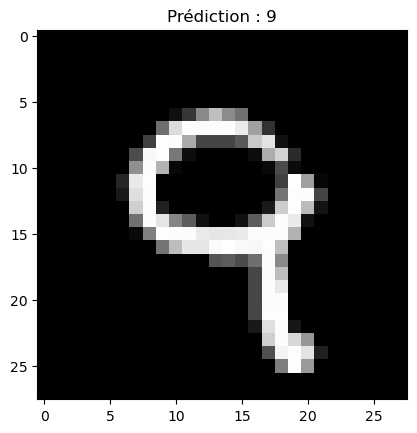

In [8]:
# 6. Faire des prédictions (exemple)
import numpy as np

# Choisir une image de test aléatoire
index = np.random.randint(0, len(x_test))
image = x_test[index]

# Redimensionner l'image pour l'affichage
image_2d = image.reshape(28, 28)

# Faire la prédiction
prediction = model.predict(image.reshape(1, 784))
predicted_label = np.argmax(prediction)

# Afficher l'image et la prédiction
import matplotlib.pyplot as plt

plt.imshow(image_2d, cmap='gray')
plt.title(f'Prédiction : {predicted_label}')